In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def linear_regression(x_train, y_train, learning_rate=0.01, num_iterations=1000):
    num_samples = len(x_train)
    num_features = x_train.shape[1]

    # Add a column of ones to account for the bias term
    X = np.concatenate((np.ones((num_samples, 1)), x_train), axis=1)

    # Initialize the weights
    weights = np.zeros(num_features + 1)

    # Perform gradient descent
    for _ in range(num_iterations):
        # Compute the predicted values
        y_pred = np.dot(X, weights)

        # Compute the error
        error = y_pred - y_train

        # Update the weights
        gradient = np.dot(X.T, error) / num_samples
        weights -= learning_rate * gradient

    return weights

Learned coefficients:
Intercept: 13269.849364458403
Slope: 2400.909963500879


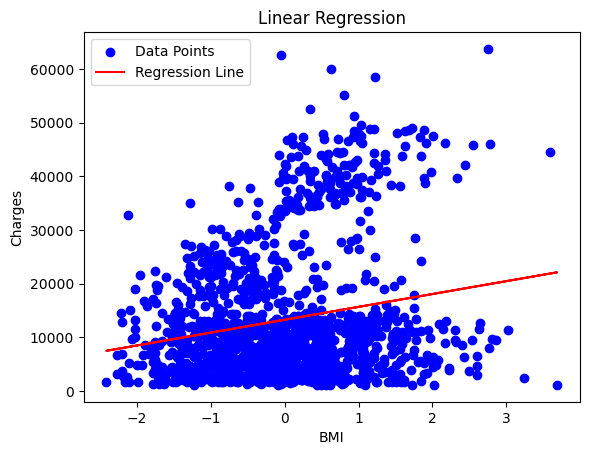

In [2]:

# Load the dataset
data = pd.read_csv('Medical Price Dataset.csv')

# Preprocess the data
# For simplicity, we will only consider the 'bmi' feature
x_train = data[['bmi']].values
y_train = data['charges'].values

# Normalize the features
x_train = (x_train - np.mean(x_train)) / np.std(x_train)

# Apply linear regression
weights = linear_regression(x_train, y_train)

# Print the learned coefficients
print('Learned coefficients:')
print('Intercept:', weights[0])
print('Slope:', weights[1])

# Plot the data points and the regression line
plt.scatter(x_train, y_train, color='blue', label='Data Points')
plt.plot(x_train, weights[0] + weights[1] * x_train, color='red', label='Regression Line')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Linear Regression')
plt.legend()
plt.show()